## CUSTOMER CHURN MACHINE LEARNING PREDICTION

## Business Understanding
In the highly competitive telecommunications industry, retaining customers is crucial for maintaining revenue and profitability. Customer churn, the phenomenon where customers stop using a company's services, poses a significant challenge. To address this, companies are increasingly leveraging machine learning techniques to predict churn and devise strategies to enhance customer retention.

This project aims to assist a telecommunication company in understanding their customer data, identifying factors contributing to churn, and predicting which customers are likely to churn. By building and evaluating classification models, we can provide actionable insights to help the company mitigate churn and improve customer loyalty.

### Stakeholders
 - Chief Marketing Officer (CMO) 
 - Customer Service Director 
 - Chief Data Officer

### Key Metrics and Success Criteria
 The Model should have an accuracy score of 85% (On balanced data)
 Good models are expected to have an accuracy score of >0.80 or 80% 

#### Features
- CustomerID -- A unique customer identification
- Gender -- Whether the customer is a male or a female
- SeniorCitizen -- Whether a customer is a senior citizen or not
- Partner -- Whether the customer has a partner or not (Yes, No)
- Dependents -- Whether the customer has dependents or not (Yes, No)
- Tenure -- Number of months the customer has stayed with the company
- Phone Service -- Whether the customer has a phone service or not (Yes, No)
- MultipleLines -- Whether the customer has multiple lines or not
- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
- MonthlyCharges -- The amount charged to the customer monthly
- TotalCharges -- The total amount charged to the customer
- Churn -- Whether the customer churned or not (Yes or No)

### Hypothesis
Null Hypothesis (H0): Customer demographics have no significant effect on churn.

Alternative Hypothesis (H1): Customer demographics have a significant effect on churn. 

### Analytical Questions
1. What is the Churn percentage based on the payment method?
2. How does the demographic factors (e.g., gender, age, dependents) influence customer churn?
3. How frequently do customers who churn interact with customer support compared to those who stay?
4. How does the tenure of a customer impact their likelihood of churning?
5. Which services (e.g., streaming, international calls, internet service) are most frequently used by customers who churn?
6. How does the type of contract (e.g., month-to-month, one year, two years) impact churn rates?
7. Do customers with multiple services show different churn rates compared to those with  fewer services?

## Data Understanding

#### Importations

In [72]:
# Data Manipulation Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import optuna
from dotenv import dotenv_values 
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings

warnings.filterwarnings('ignore')

#### Load the datasets

In [73]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values (r'C:\Users\MERCY CHEBET\Desktop\Azubi\Customer-Churn-ML-Prediction\datasets\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get('SERVER')
database = environment_variables.get('DATABASE')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [74]:
connection = pyodbc.connect(connection_string)

In [75]:
# Loading the First 3000 dataset
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [76]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [78]:
# Loading the second 2000 data
df=pd.read_csv('../datasets/LP2_Telco-churn-second-2000.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### Merging the Datasets

In [81]:
# Combine DataFrames
churn_df = pd.concat([data, df], ignore_index=True)

churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [82]:
# Covert all True to 'Yes' and False to 'No' for a good data consistency 

churn_df.replace(True, 'Yes', inplace=True)
churn_df.replace(False, 'No', inplace=True)

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


### EDA

In [83]:
churn_df.shape

(5043, 21)

In [84]:
churn_df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
5038  6840-RESVB    Male              0     Yes        Yes      24   
5039  2234-XADUH  Female              0     Yes        Yes      72   
5040  4801-JZAZL  Female              0     Yes        Yes      11   
5041  8361-LTMKD    Male              1     Yes         No       4   
5042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No              None             DSL 

In [85]:
churn_df.duplicated().sum()

np.int64(0)

In [86]:
# Missing values with their percentages 
churn_df.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(churn_df)) * 100)

,Null Count,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,269,5.334127
InternetService,0,0.000000
OnlineSecurity,651,12.908983


In [87]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [88]:
churn_df.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231
DeviceProtection,4392,3,No,2219


In [89]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [90]:
# Columns in our combined dataset 

columns= churn_df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Univariate Analysis

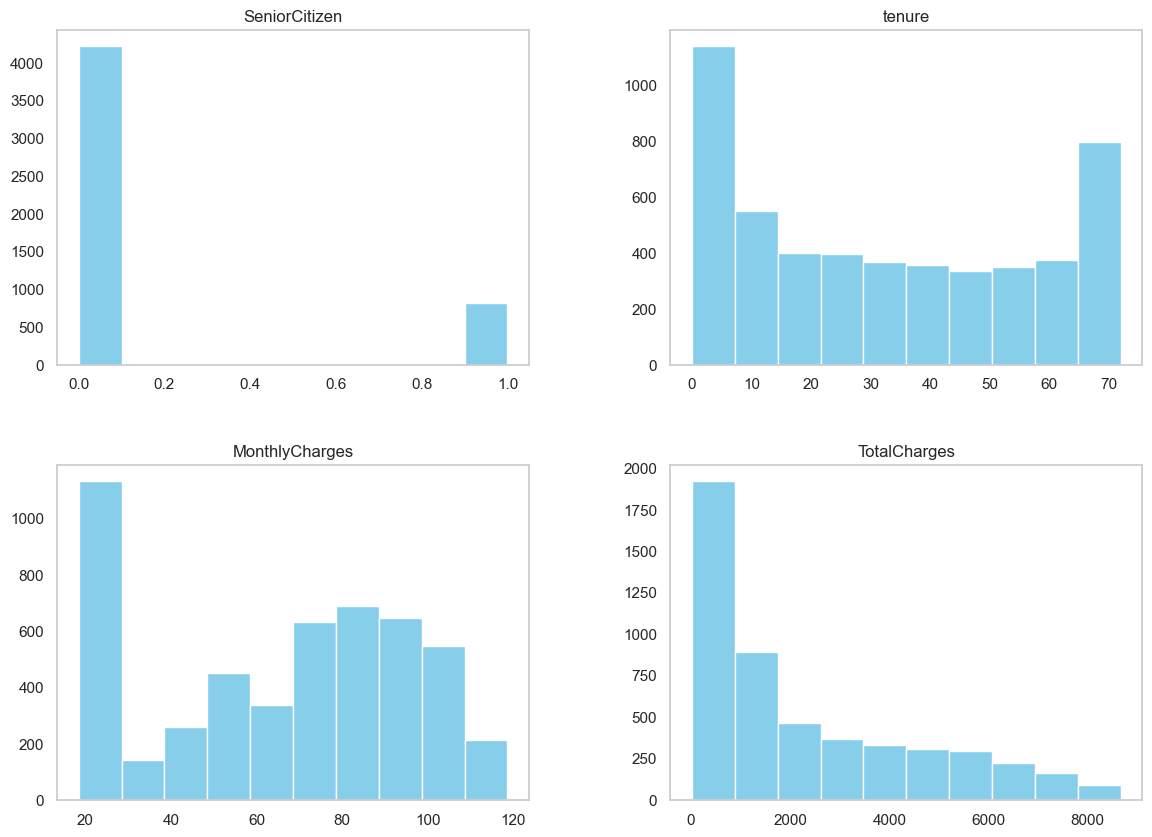

In [91]:
# Distribution of Numerical Feature
churn_df.hist(figsize= (14,10),grid=False, color='skyblue')
plt.show()

##### Key Insights
- No duplicated Values in the dataset

- **Uneven Distribution**:
  - The numerical columns exhibit uneven distribution, indicating variability in the data spread.

- **Bimodal Distributions**:
  - The bimodal distributions observed in the `Age` and `MonthlyCharges` columns suggest the presence of distinct customer segments within the dataset. These segments may represent different demographics, usage patterns, or pricing plans.

- **Unimodal Distribution with a Long Tail**:
  - The `TotalCharges` column displays a unimodal distribution with a long tail, highlighting the presence of extreme values or outliers.

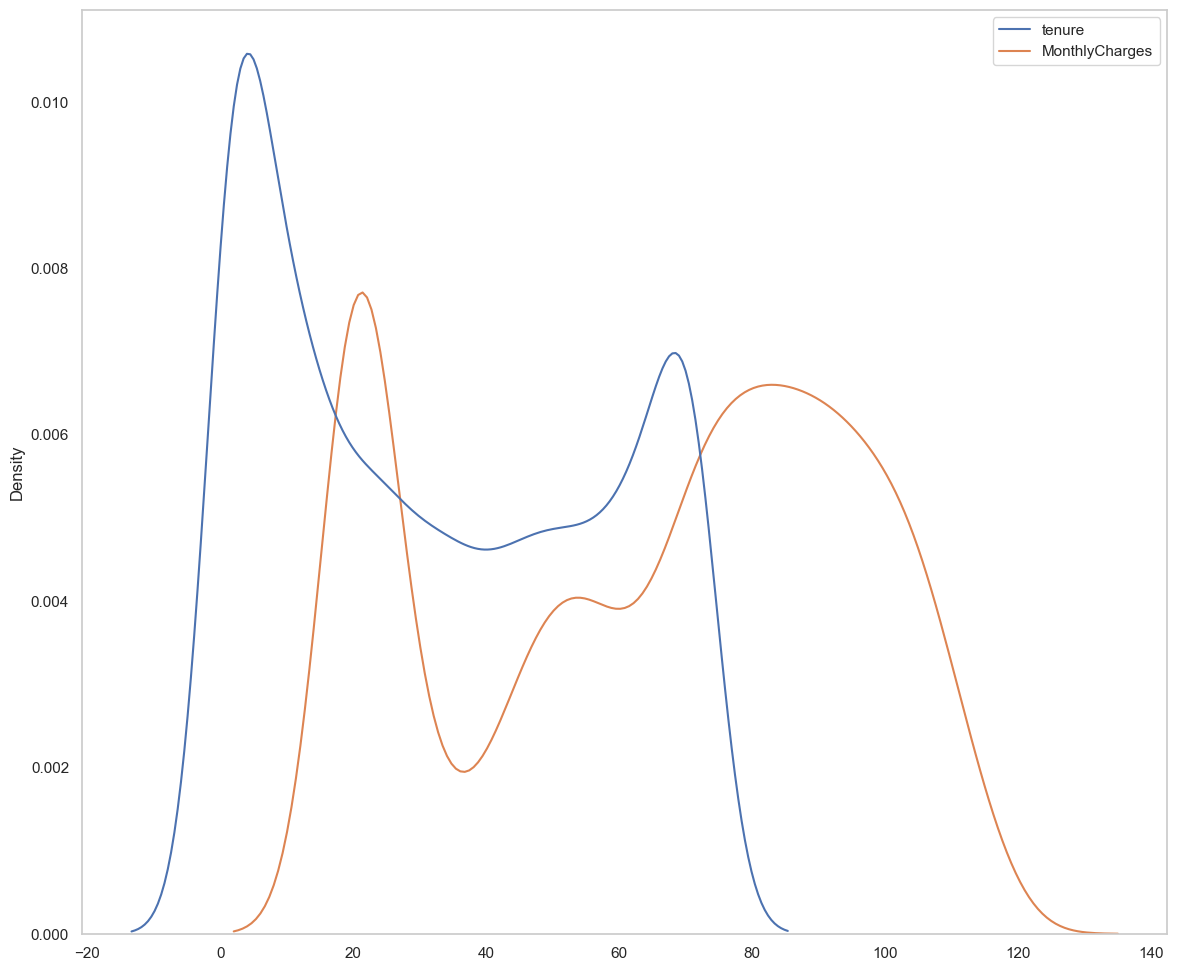

In [92]:
# Create a figure with the specified size
plt.figure(figsize=(14,12))
sns.kdeplot(churn_df.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
plt.grid(False)
plt.show()

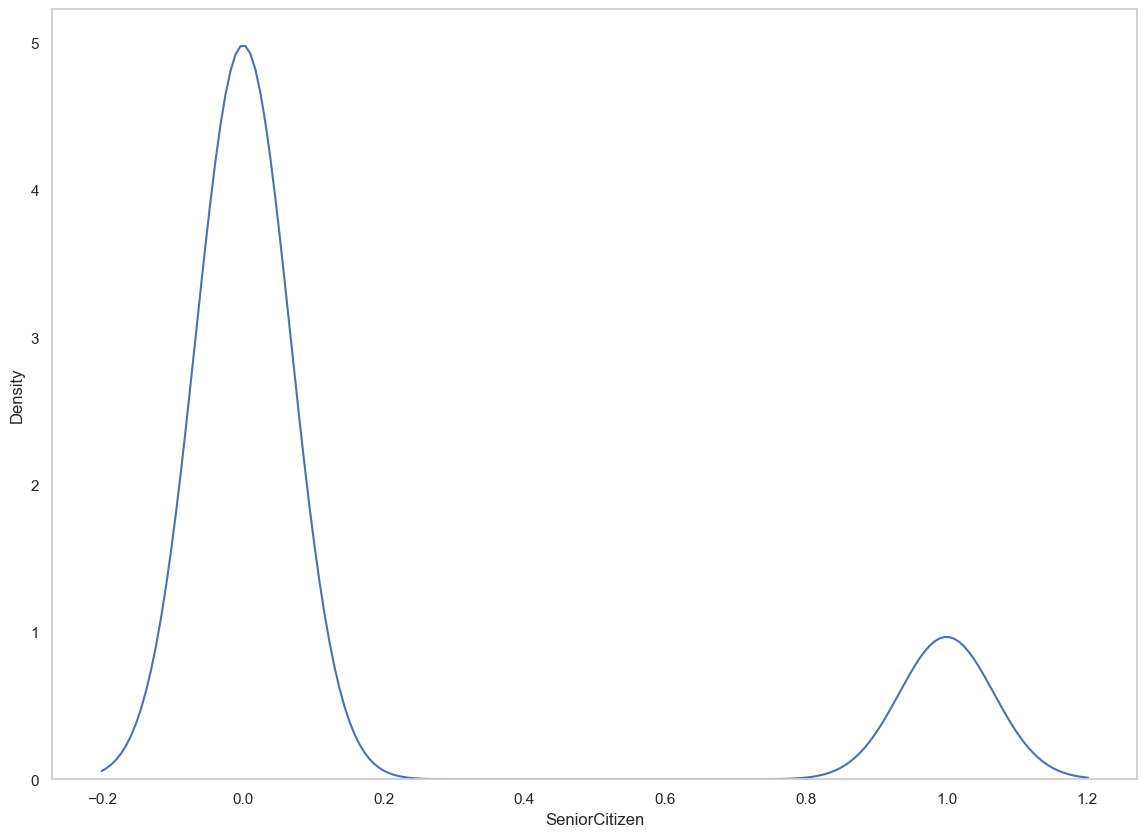

In [93]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_df['SeniorCitizen'])
plt.grid(False)
plt.show()

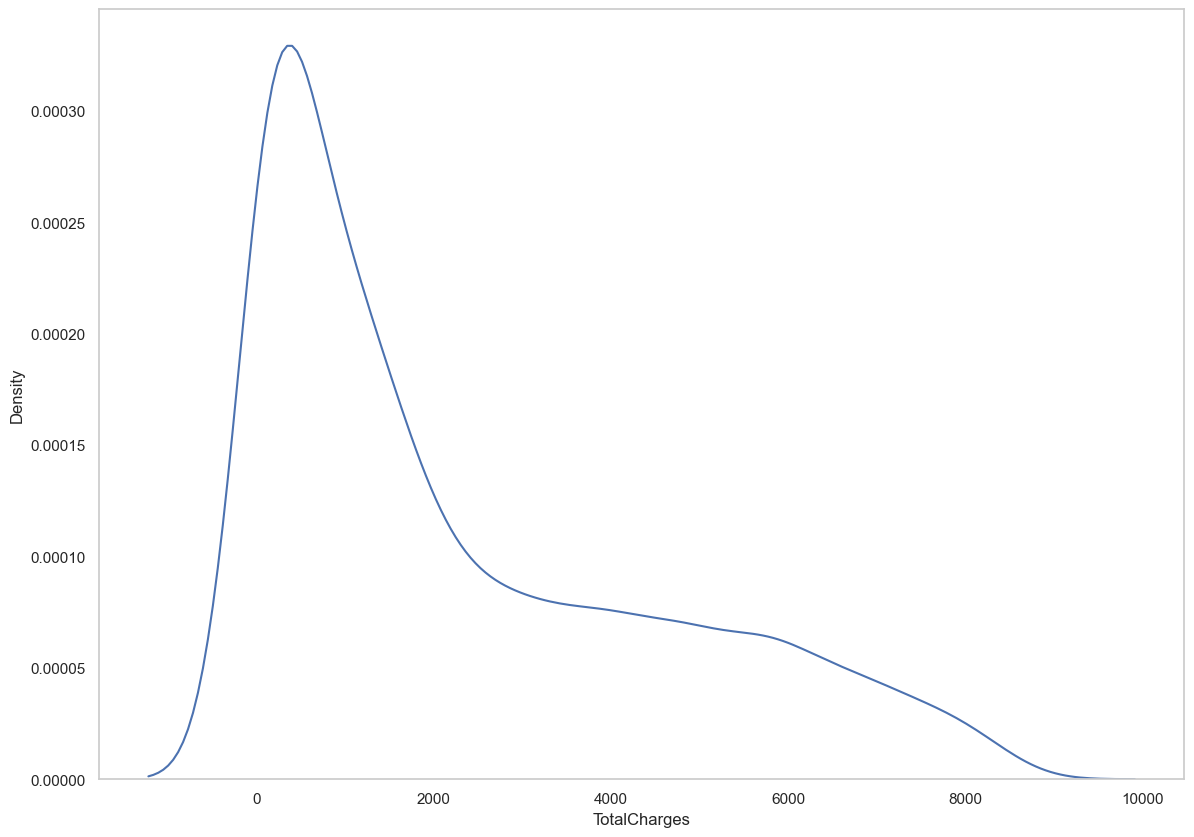

In [94]:
plt.figure(figsize=(14,10))
sns.kdeplot(churn_df['TotalCharges'])
plt.grid(False)
plt.show()

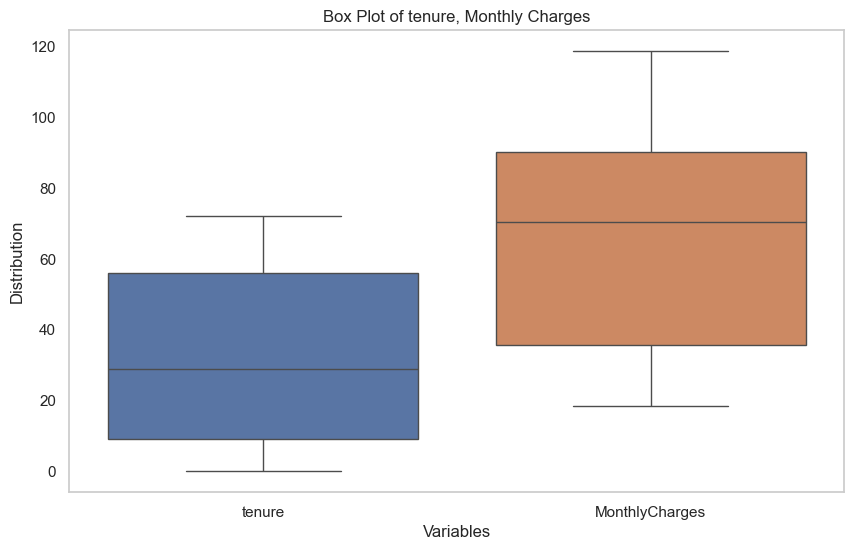

In [95]:
# Create a box plot for multiple columns
plt.figure(figsize=(10, 6))
sns.boxplot(churn_df[['tenure', 'MonthlyCharges']])

# Add titles and labels
plt.title('Box Plot of tenure, Monthly Charges')
plt.xlabel('Variables')
plt.ylabel('Distribution')

plt.grid(False)

# Display the plot
plt.show()

#### Bivariate Analysis

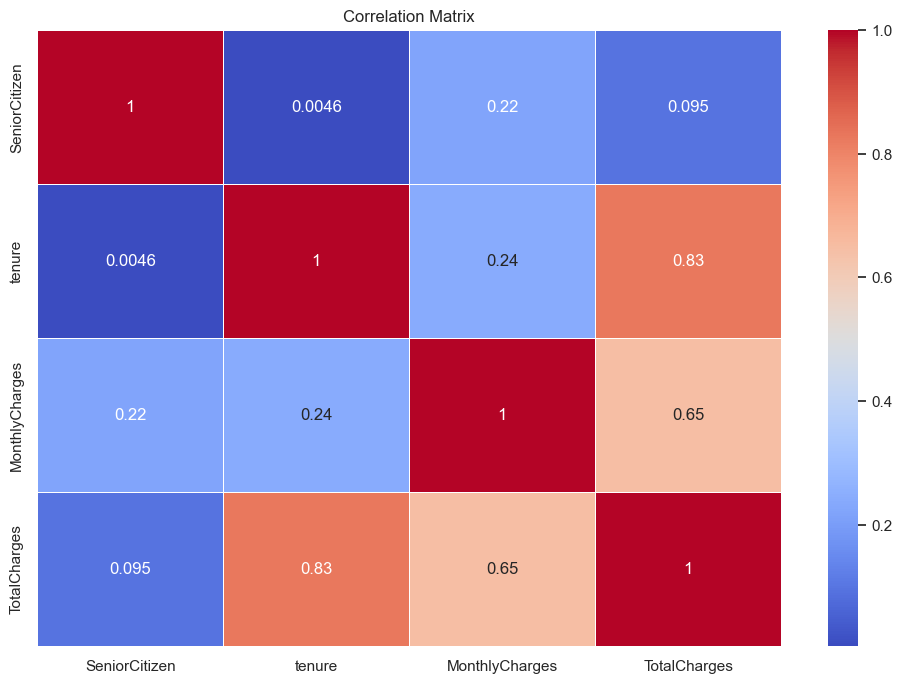

In [96]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

numeric_df = churn_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

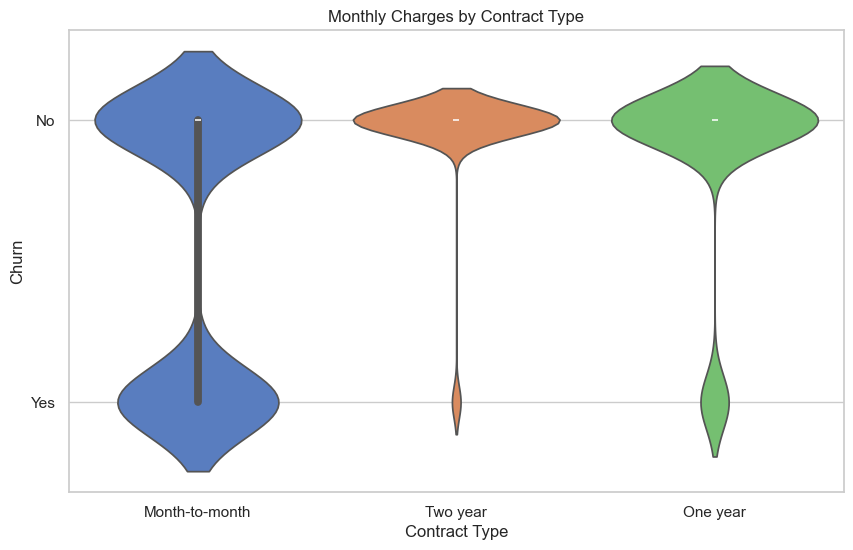

In [97]:
# Distribution of Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Contract', y='Churn', data=df, palette='muted')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.show()

#### Key Insights
- Contracts of One Year is wider and has higher churn values, it suggests a low churn rate
- Two year Contract type has a narrower distribution at churn values,thus indicates that customers with that contract type are less likely to churn
- Month to Month Contract are likely to churn

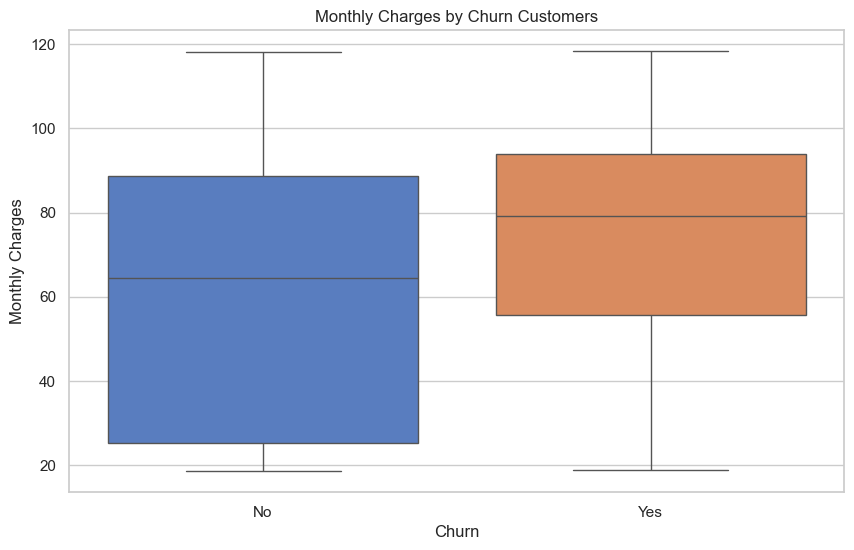

In [98]:
#Distribution of Monthly Charges for Customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='muted')
plt.title('Monthly Charges by Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

#### Key Insights
-  The higher median monthly charges for non-churned customers suggest that customers who stay with the company tend to pay more on average.
-  The lower median monthly charges for churned customers suggest that those who leave the company tend to pay less on average.

### Multivariate Analysis

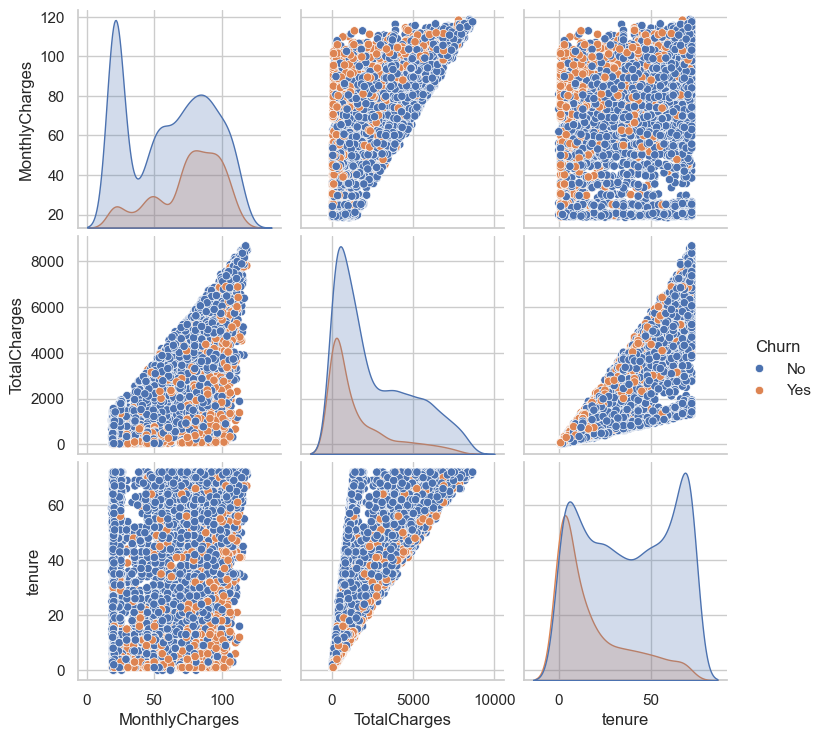

In [99]:
sns.pairplot(churn_df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

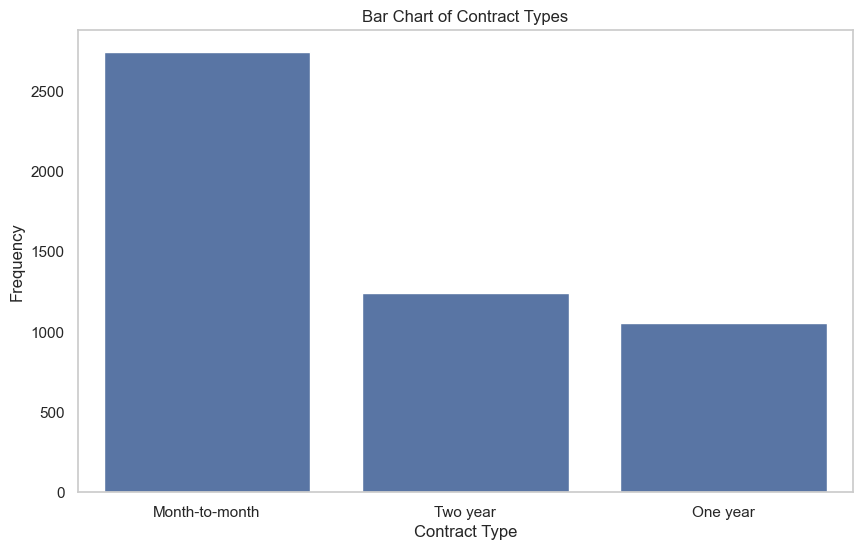

In [100]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_df, x='Contract', order=churn_df['Contract'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

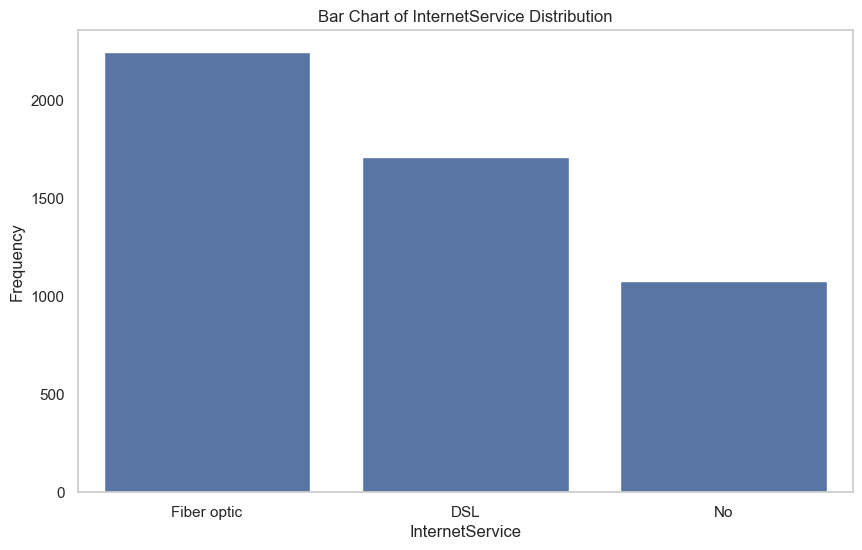

In [101]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_df, x='InternetService', order=churn_df['InternetService'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of InternetService Distribution')
plt.xlabel('InternetService')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

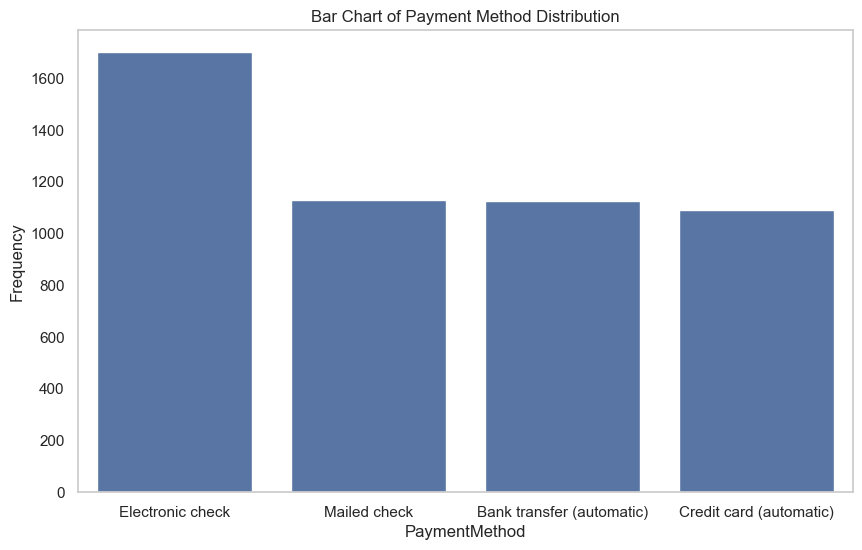

In [102]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Contract' column
plt.figure(figsize=(10, 6))
sns.countplot(churn_df, x='PaymentMethod', order=churn_df['PaymentMethod'].value_counts().index)

# Add titles and labels
plt.title('Bar Chart of Payment Method Distribution')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

plt.grid(False)

# Display the plot
plt.show()

### Testing the Hypothesis

In [103]:
#  Select categorical demographic columns
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Initialize a dictionary to store the chi-square test results
chi2_results = {}

# Loop through the demographic columns and perform chi-square test
for column in demographic_columns:
    contingency_table = pd.crosstab(churn_df[column], churn_df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    chi2_results[column] = {
        'chi2_statistic': chi2,
        'p_value': p
    }

# Print the chi-square test results
for column, result in chi2_results.items():
    print(f"Column: {column}")
    print(f"Chi-square Statistic: {result['chi2_statistic']}")
    print(f"P-value: {result['p_value']}")
    print("Significant" if result['p_value'] < 0.05 else "Not Significant")
    print("")

# Interpretation of results
for column, result in chi2_results.items():
    if result['p_value'] < 0.05:
        print(f"The null hypothesis is rejected for {column}. There is a significant effect of {column} on churn.")
    else:
        print(f"The null hypothesis is not rejected for {column}. There is no significant effect of {column} on churn.")

Column: gender
Chi-square Statistic: 0.021628520637713346
P-value: 0.8830796247912641
Not Significant

Column: SeniorCitizen
Chi-square Statistic: 112.2962875886836
P-value: 3.07711327027367e-26
Significant

Column: Partner
Chi-square Statistic: 99.8828123324231
P-value: 1.6168633995925437e-23
Significant

Column: Dependents
Chi-square Statistic: 147.7850538380756
P-value: 5.285883022161784e-34
Significant

The null hypothesis is not rejected for gender. There is no significant effect of gender on churn.
The null hypothesis is rejected for SeniorCitizen. There is a significant effect of SeniorCitizen on churn.
The null hypothesis is rejected for Partner. There is a significant effect of Partner on churn.
The null hypothesis is rejected for Dependents. There is a significant effect of Dependents on churn.


### Analytical Questions

1. What is the Churn percentage based on the payment method?

               PaymentMethod ChurnPercentage
0  Bank transfer (automatic)        17.75837
1    Credit card (automatic)       13.850837
2           Electronic check       44.865404
3               Mailed check       17.944785


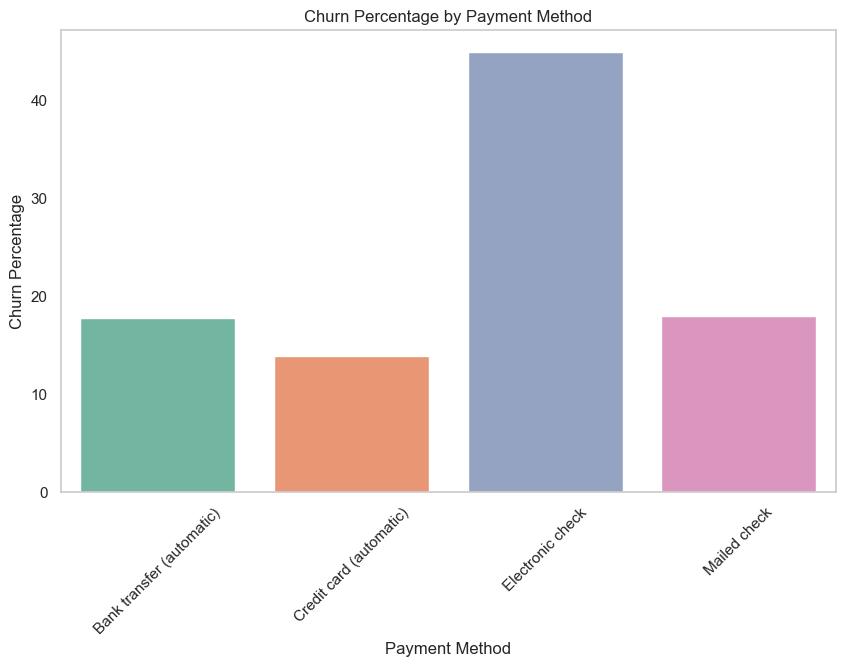

In [104]:
churn_percentage = data.groupby('PaymentMethod')['Churn'].mean() * 100
churn_percentage = churn_percentage.reset_index()
churn_percentage.columns = ['PaymentMethod', 'ChurnPercentage']
print(churn_percentage)


# Create a bar plot of churn percentage by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='ChurnPercentage',palette='Set2', data=churn_percentage)

# Add title and labels
plt.title('Churn Percentage by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.grid(False)

# Show plot
plt.show()

Key Insights
- High percentage of churn in customers who use Electronic check as compared to other payment Methods
- Customers who use the automatic Credit card have lower churn percentage

2. How does the demographic factors (e.g., gender, age, dependents) influence customer churn?

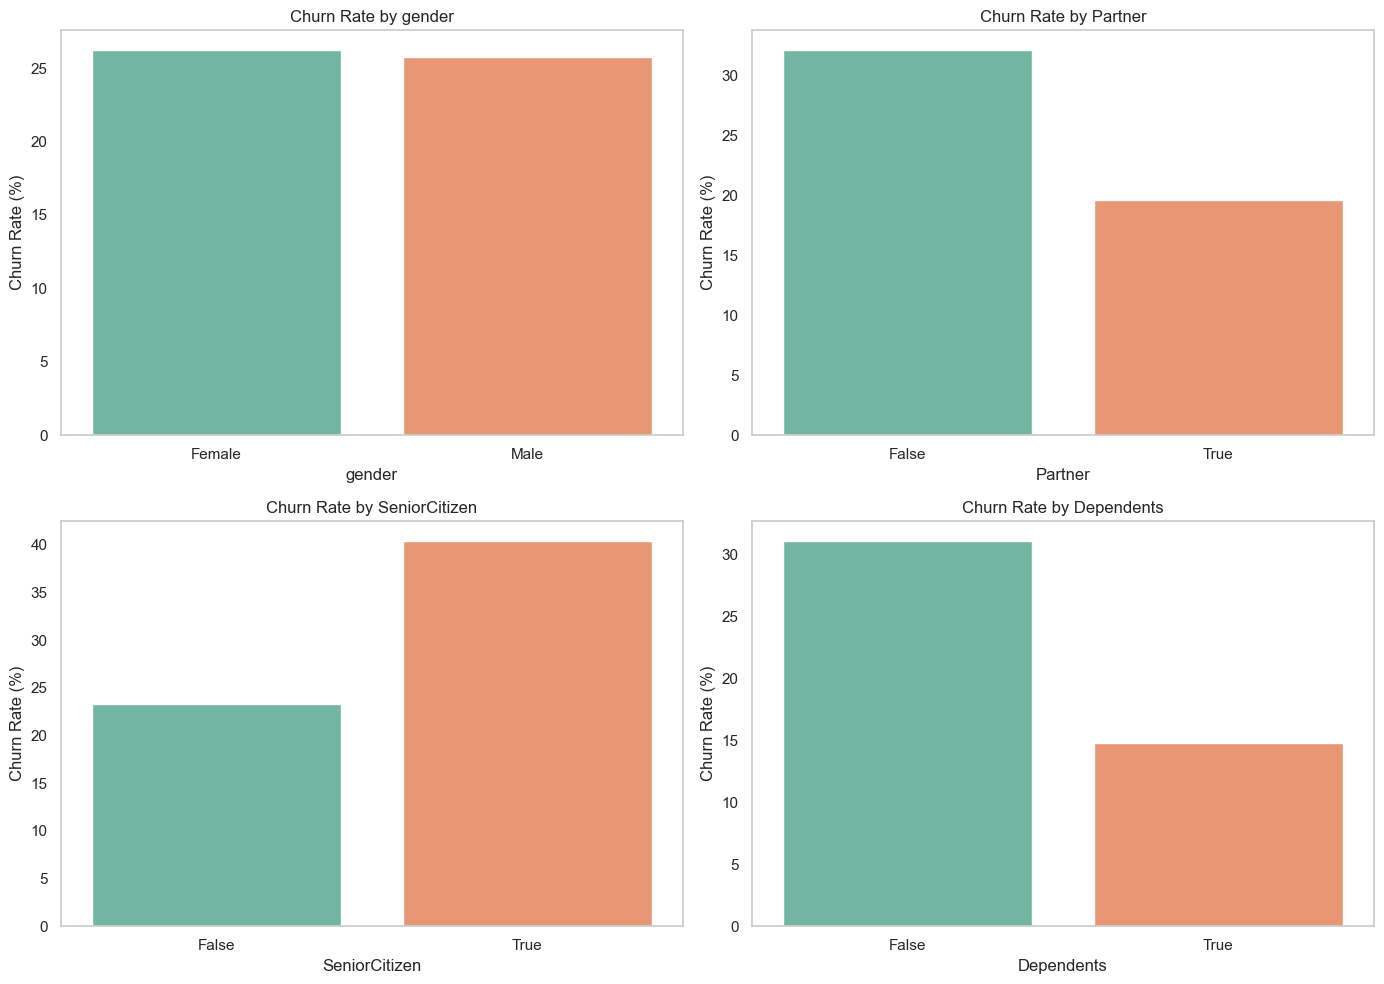

In [105]:
# Define the demographic features
demographic_features = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# Plotting the churn rates for each demographic feature
plt.figure(figsize=(14, 10))

for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    churn_rates = data.groupby(feature)['Churn'].mean() * 100
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set2')
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate (%)')
    plt.grid(False)

plt.tight_layout()
plt.show()

Key Insights
- There is a relatively smaller percentage of female who churned as compared to Male
- Customers who do not have a partner tend to churn at a higher rate compared to those who do have a partner. 
- Senior citizens are more likely to churn compared to non-senior citizens
- Customers without dependents have a higher churn rate compared to those with dependents. It suggests that the presence of dependents may contribute to higher customer retention

3. How frequently do customers who churn interact with customer support compared to those who stay?

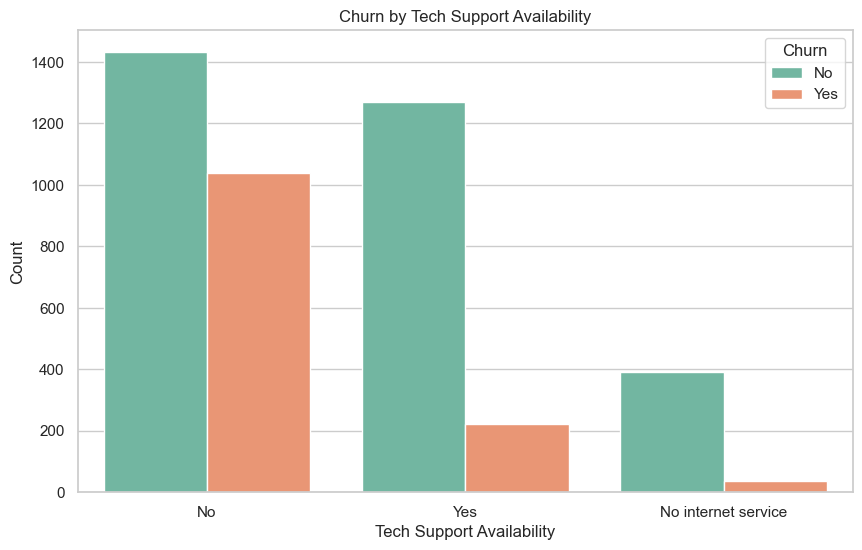

In [106]:
# Plot churn by TechSupport
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='TechSupport', hue='Churn', palette='Set2')
plt.title('Churn by Tech Support Availability')
plt.xlabel('Tech Support Availability')
plt.ylabel('Count')
plt.show()

Key Insights
- Customers without Tech Support have higher churn rates compared to those with Tech Support across all categories.
- Having Tech Support significantly reduces churn, as seen in lower churn rates for customers who have access to this service.

4. How does the tenure of a customer impact their likelihood of churning?

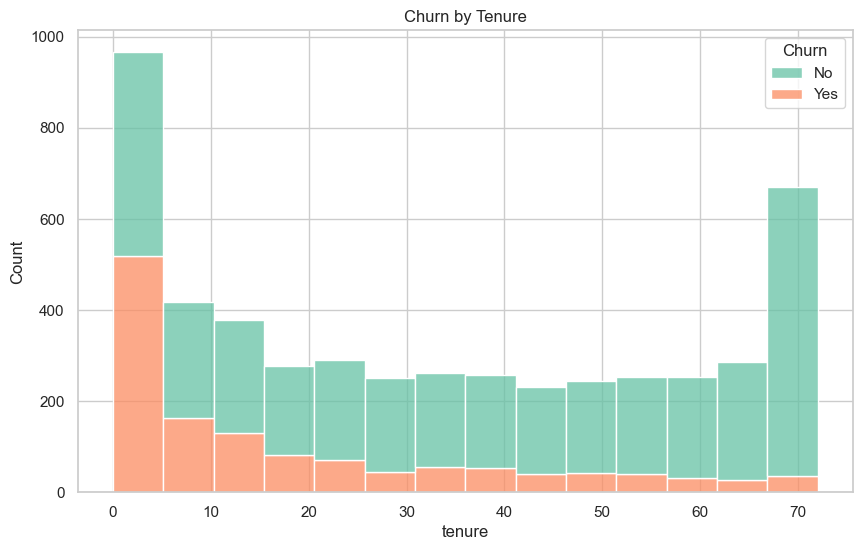

In [107]:
# Plot churn by tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_df, x='tenure', hue='Churn', multiple='stack', palette='Set2')
plt.title('Churn by Tenure')
plt.show()

Key Insights
- As tenure increases, the churn rate decreases significantly for customers who churn. This trend suggests that longer-term customers are more likely to stay.
- Customers who do not churn indicates higher churn rates initially (possibly due to contractual reasons or initial dissatisfaction) and then decreasing churn rates as tenure increases, reflecting increased customer loyalty over time.

5. Which services (e.g., streaming, international calls, internet service) are most frequently used by customers who churn?

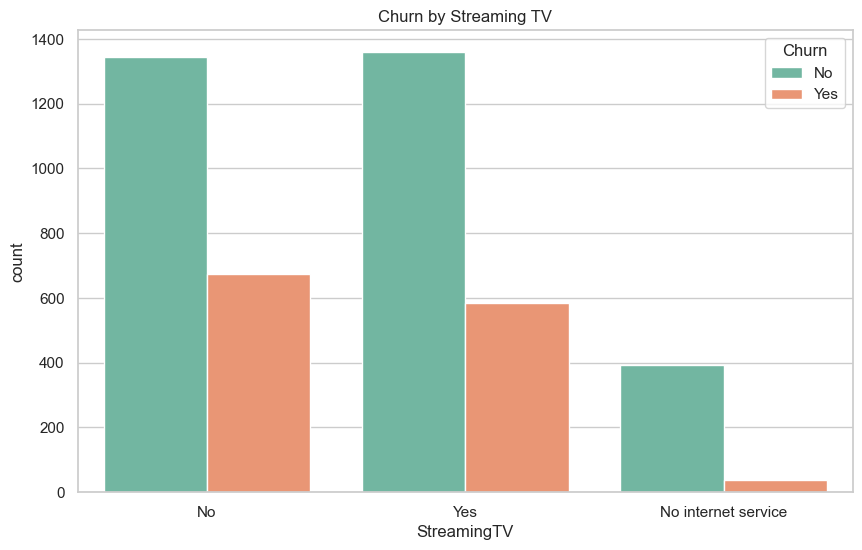

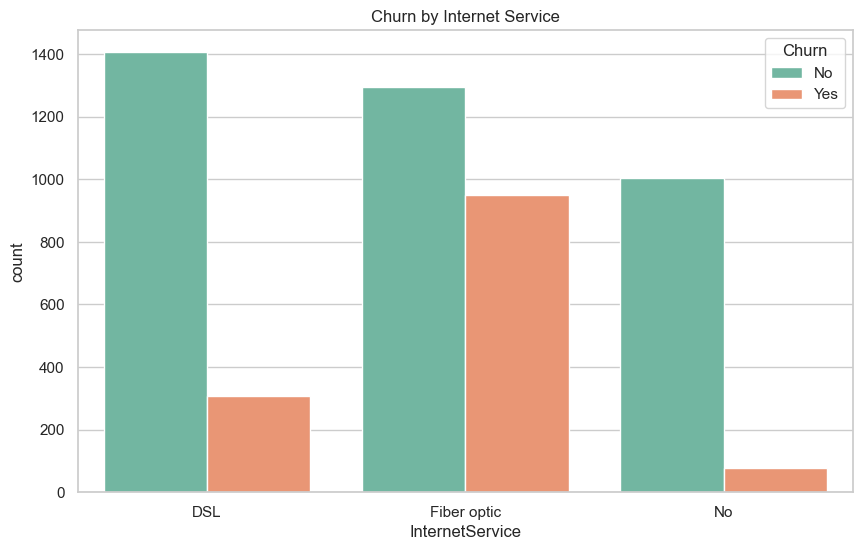

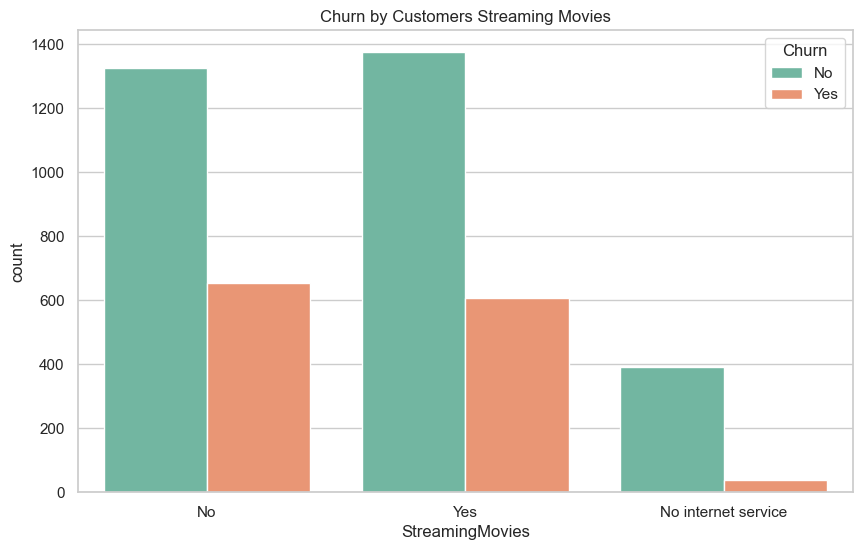

In [108]:
# Plot churn by streaming TV
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='StreamingTV', hue='Churn', palette='Set2')
plt.title('Churn by Streaming TV')
plt.show()

# Plot churn by internet service
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='InternetService', hue='Churn', palette='Set2')
plt.title('Churn by Internet Service')
plt.show()

# Plot churn by Streaming Movies
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='StreamingMovies', hue='Churn', palette='Set2')
plt.title('Churn by Customers Streaming Movies')
plt.show()


6. How does the type of contract (e.g., month-to-month, one year, two years) impact churn rates?

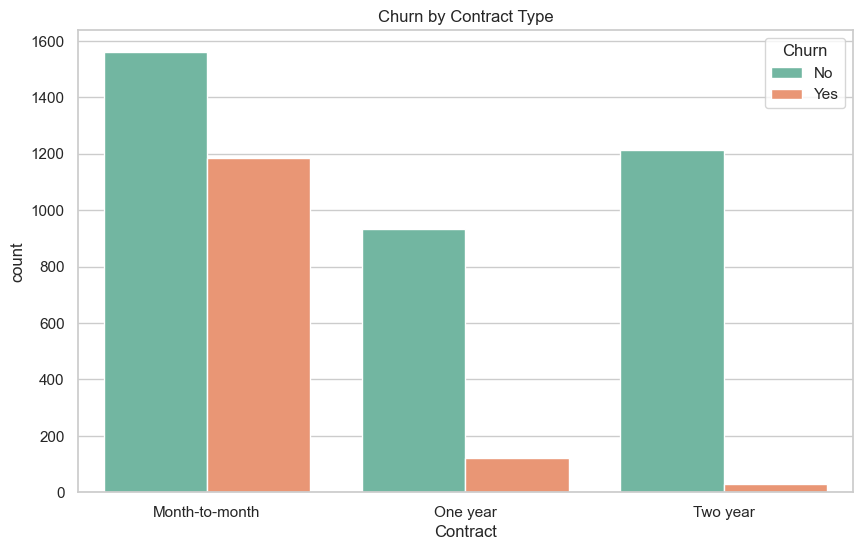

In [109]:
# Plot churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.show()


Key Insights
- Customers on month-to-month contracts have the highest churn rates
- Two-year contracts have the lowest churn rate. This suggests longer contract terms are associated with higher customer retention.

7. Do customers with multiple services show different churn rates compared to those with  fewer services?

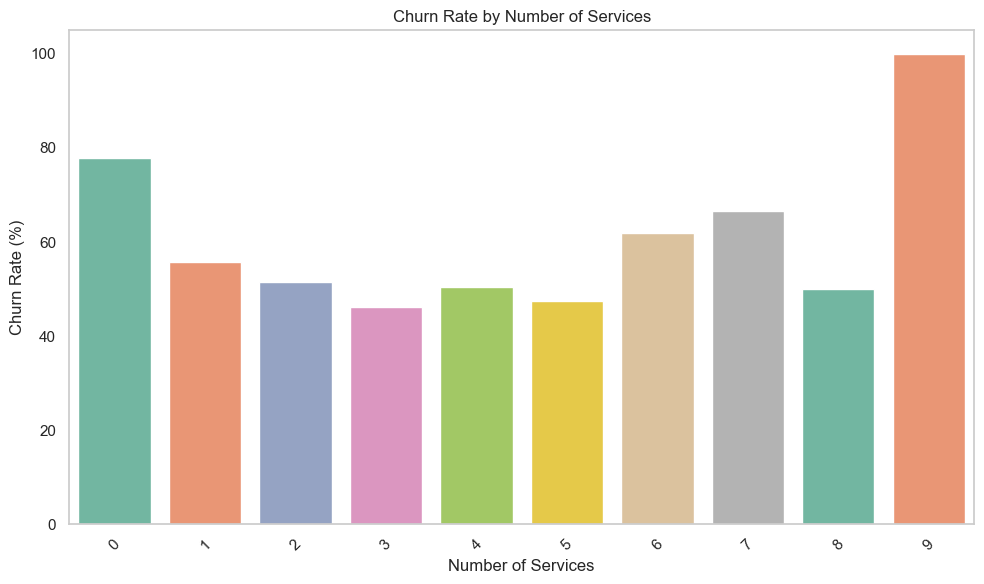

In [110]:
# Data generation 
np.random.seed(0)
n_customers = 1000
data = pd.DataFrame({
    'PhoneService': np.random.choice(['Yes', 'No'], size=n_customers),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_customers),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], size=n_customers),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
    'Churn': np.random.choice([0, 1], size=n_customers)
})

# Define a function to count the number of services a customer has
def count_services(row):
    services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    count = 0
    for service in services:
        if row[service] in ['Yes', 'DSL', 'Fiber optic']:
            count += 1
    return count

# Create a new column for the number of services
data['NumberOfServices'] = data.apply(count_services, axis=1)

# Calculate churn rates by number of services
churn_rates = data.groupby('NumberOfServices')['Churn'].mean() * 100

# Plotting the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set2')
plt.title('Churn Rate by Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid (False)
plt.show()

## Data Preparation

#### Handling Missing Values

In [111]:
# TotalCharges column
churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].median(), inplace=True) 

In [112]:
#For missing values in categorical columns 
miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',                   
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Churn']

for col in miss_categ:
    mode_val = churn_df[col].mode()[0]                                      
    churn_df[col].fillna(mode_val, inplace=True)

In [113]:
# convert churn_df to csv for Power Bi Visualisation before further Modeling

churn_df.to_csv('churn_df.csv', index= False)

In [114]:
#Drop the Cutomer Id Column it doe not have any statistical or computational significance and has too many unknown categories that will affect the encoding process
churn_df = churn_df.drop('customerID', axis=1)

In [115]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Split data to X and y (Input and Output variables )

In [116]:
# Input variables

X= churn_df.drop ('Churn', axis= 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [117]:
# Output variable / target variable 
y= churn_df['Churn']
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [118]:
(X.shape, y.shape) 

((5043, 19), (5043,))

#### Split data to categorical and numerical columns

In [119]:
numerical_columns= X.select_dtypes('number').columns
numerical_columns 

categorical_columns= X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [120]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4034, 19), (4034,)), ((1009, 19), (1009,)))

In [121]:
# We use a lable encoder for y because its not a 2 dimentional array 

encoder = LabelEncoder()

# Fit the encoder to the target variable
y_train_encoded= encoder.fit_transform(y_train)
y_test_encoded= encoder.transform(y_test)

In [122]:
# Check skewness to determine which scaler to use 
X.select_dtypes('number').skew()

SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.946284
dtype: float64

Decision Standard scaler is disqualified as our data is not close to a bell shape MinMax scaller is diqualified as our data has outliers We use Robust Scaler due to the biases in X train

In [123]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2300.633691,2267.965879,18.799999,418.000,1401.150024,3857.575073,8670.100000


We decide on Quantile transformer as it transform our data to a close to a bell shape

#### Pipeline

In [124]:
numeric_pipeline= Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('QuantileTransformation', QuantileTransformer ()),
])

categorical_pipeline= Pipeline([
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('encoder', OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),

])

In [125]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('QuantileTransformation',
                                                  QuantileTransformer())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

## Modelling  and Evaluation

In [126]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]


# Arrays to store individual model predictions and their probabilities
model_predictions = {}
model_probabilities = {}

# Store confusion matrices for each model
confusion_matrices = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Store predictions and probabilities
    model_predictions[model_name] = y_pred
    model_probabilities[model_name] = y_prob

    # Store confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    confusion_matrices[model_name] = cm

    # Evaluate model performance
    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test_encoded, y_prob)

    # Print ROC AUC score
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('=' * 50)


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

ROC AUC Score: 0.8527
Random Forest
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.63      0.53      0.58       267

    accuracy                           0.79      1009
   macro avg       0.74      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009

ROC AUC Score: 0.8325
KNN
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       742
           1       0.53      0.51      0.52       267

    accuracy                           0.75      1009
   macro avg       0.68      0.67      0.68   

In [127]:
# Convert confusion matrices to DataFrame
df_scores = pd.DataFrame.from_dict({model_name: [conf_matrix] for model_name, conf_matrix in confusion_matrices.items()}, orient='index', columns=['confusion_matrix'])
df_scores

,confusion_matrix
Logistic Regression,"[[659, 83], [117, 150]]"
Random Forest,"[[660, 82], [126, 141]]"
KNN,"[[620, 122], [130, 137]]"
SVM,"[[661, 81], [123, 144]]"
GBM,"[[657, 85], [117, 150]]"
Neural Network,"[[643, 99], [118, 149]]"


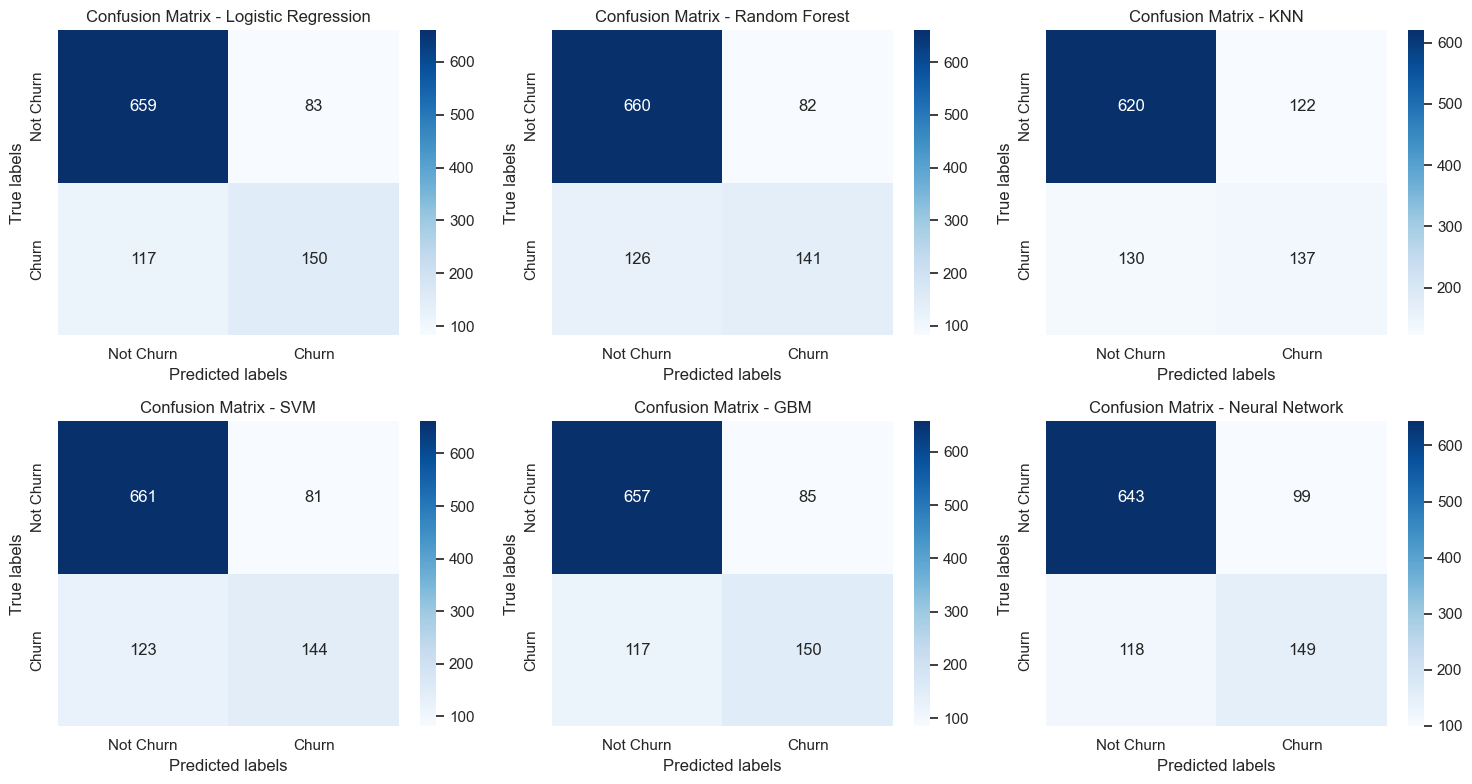

In [128]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(df_scores)

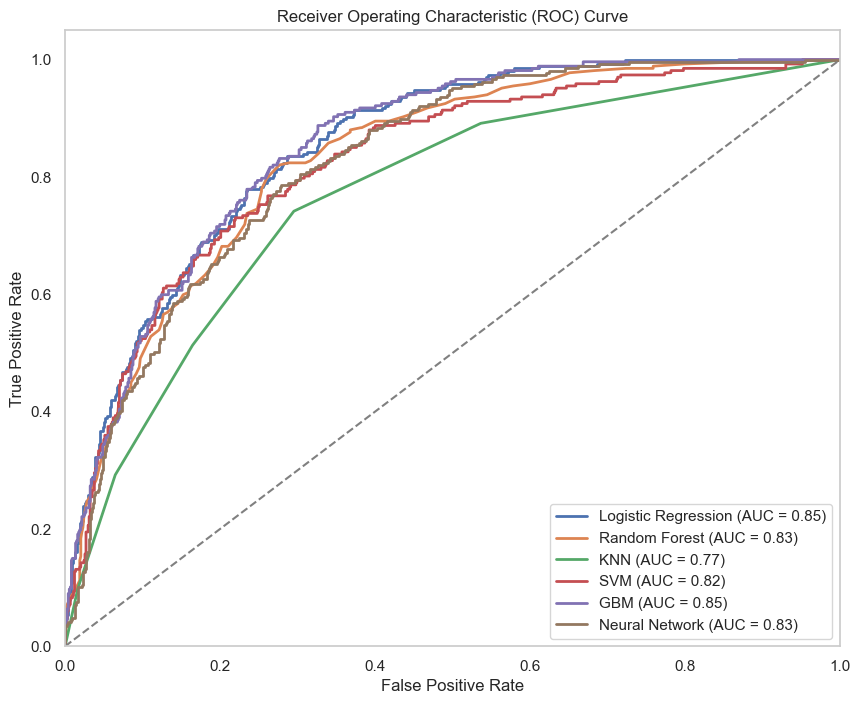

In [129]:
# Plot ROC AUC curve for all models
plt.figure(figsize=(10, 8))

# Iterate over each model's probabilities and plot ROC curve
for model_name, y_prob in model_probabilities.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

#### Hyperparameter Tuning

In [130]:
#Define parameter grids for tuning

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    },
    'GBM': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    }
}

In [131]:
# Perform Hyperparameter Tuning

best_estimators = {}

for model_name, classifier in models:
    # Define the pipeline with the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train_encoded)
    
    # Store the best estimator
    best_estimators[model_name] = grid_search.best_estimator_

    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    auc_roc = roc_auc_score(y_test_encoded, y_prob)
    
    # Print best parameters and ROC AUC score
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best ROC AUC score for {model_name}: {grid_search.best_score_:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    print('=' * 50)

Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best ROC AUC score for Logistic Regression: 0.8499
Accuracy: 0.7849
Precision: 0.6008
Recall: 0.5581
F1 Score: 0.5786
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best ROC AUC score for Random Forest: 0.8480
Accuracy: 0.7849
Precision: 0.6008
Recall: 0.5581
F1 Score: 0.5786
Best parameters for KNN: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best ROC AUC score for KNN: 0.8116
Accuracy: 0.7849
Precision: 0.6008
Recall: 0.5581
F1 Score: 0.5786
Best parameters for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best ROC AUC score for SVM: 0.8464
Accuracy: 0.7849
Precision: 0.6008
Recall: 0.5581
F1 Score: 0.5786
Best parameters for GBM: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Best ROC AUC score for GBM: 0.8482
Accuracy: 0

Do not continue printing comparison work ahead

Trying it on both balanced and unbalanced data for comparison. For the Balanced data we did oversampling using smote

In [132]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True, random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42))
]

#### Train on unbalanced data

In [133]:
unbalanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    unbalanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    unbalanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']
 
    unbalanced_table.loc[len(unbalanced_table)]= [model_name, accuracy, precision, recall,f1]
 
unbalanced_table.sort_values(by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,KNN,0.750248,0.747887,0.750248,0.749018
5,Neural Network,0.784936,0.780338,0.784936,0.782328
1,Random Forest,0.793855,0.784811,0.793855,0.787568
3,SVM,0.797820,0.789365,0.797820,0.791972
4,GBM,0.799802,0.793125,0.799802,0.795534
0,Logistic Regression,0.801784,0.794861,0.801784,0.797264


In [134]:
# Viewing pipelines each with its model
unbalanced_pipeline

{'Logistic Regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    RobustScaler()),
                                                                   ('QuantileTransformation',
                                                                    QuantileTransformer())]),
                                                   Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                           

#### Train on Balanced Data

In [135]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline

balanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline= {}
 
for model_name, classifier in models:
   
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('OverSampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
 
    pipeline.fit(X_train,y_train_encoded)
   
    balanced_pipeline [model_name]= pipeline
 
    y_pred = pipeline.predict(X_test)
 
   
    balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
    accuracy= balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
 
    balanced_table.loc[len(balanced_table)]= [model_name, accuracy, precision, recall,f1]
 
balanced_table.sort_values(by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,KNN,0.684836,0.756092,0.684836,0.702432
5,Neural Network,0.749257,0.795219,0.749257,0.761398
0,Logistic Regression,0.754212,0.808878,0.754212,0.767023
3,SVM,0.765114,0.793900,0.765114,0.774105
1,Random Forest,0.777007,0.780609,0.777007,0.778671
4,GBM,0.788900,0.804633,0.788900,0.794521


In [136]:
# View balanced data pipelines 
balanced_pipeline

{'Logistic Regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    RobustScaler()),
                                                                   ('QuantileTransformation',
                                                                    QuantileTransformer())]),
                                                   Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                           

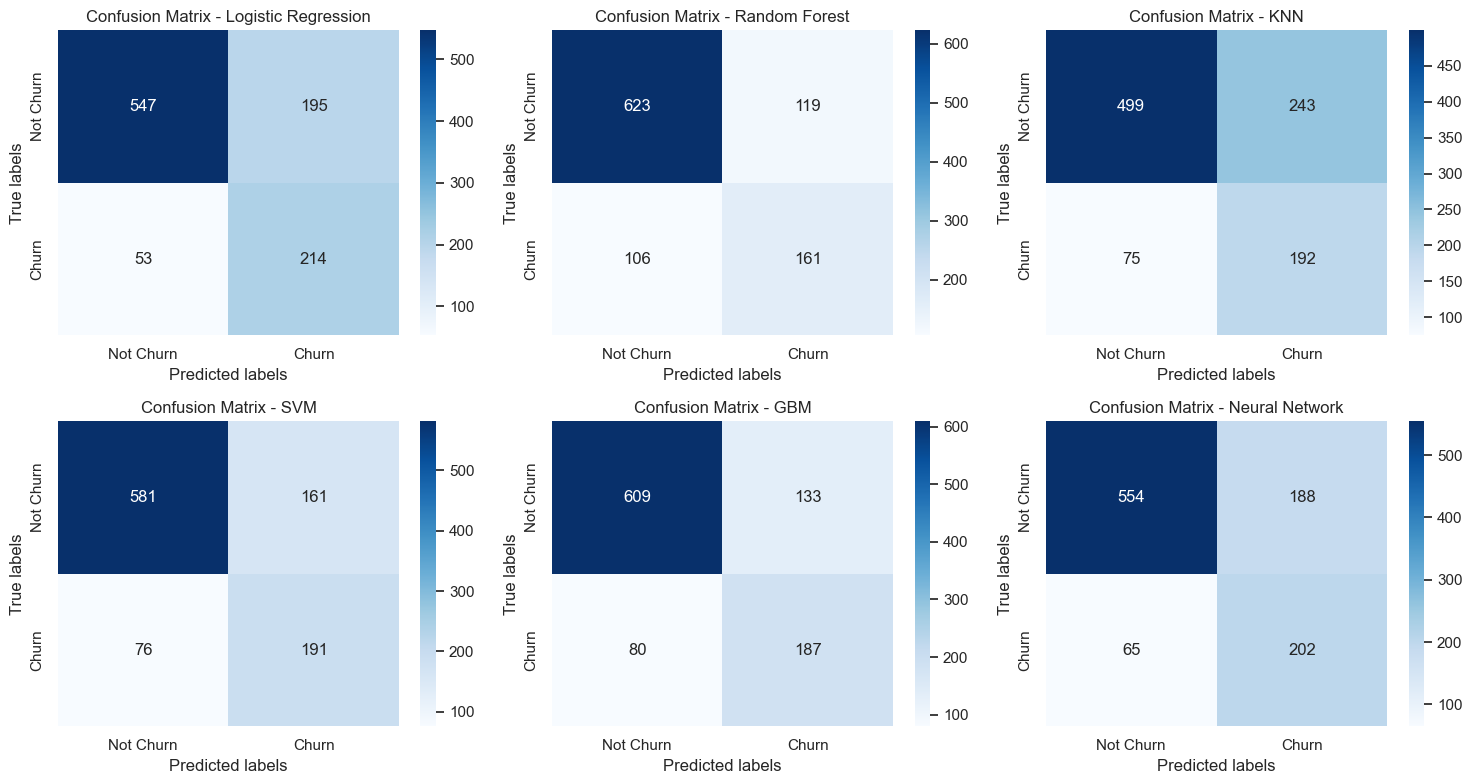

In [137]:
def plot_confusion_matrices(balanced_pipeline, X_test, y_test_encoded, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(balanced_pipeline) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (model_name, pipeline) in enumerate(balanced_pipeline.items()):
        y_pred = pipeline.predict(X_test)
        conf_matrix = confusion_matrix(y_test_encoded, y_pred)
        
        ax = axes[i]
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(balanced_pipeline, X_test, y_test_encoded)

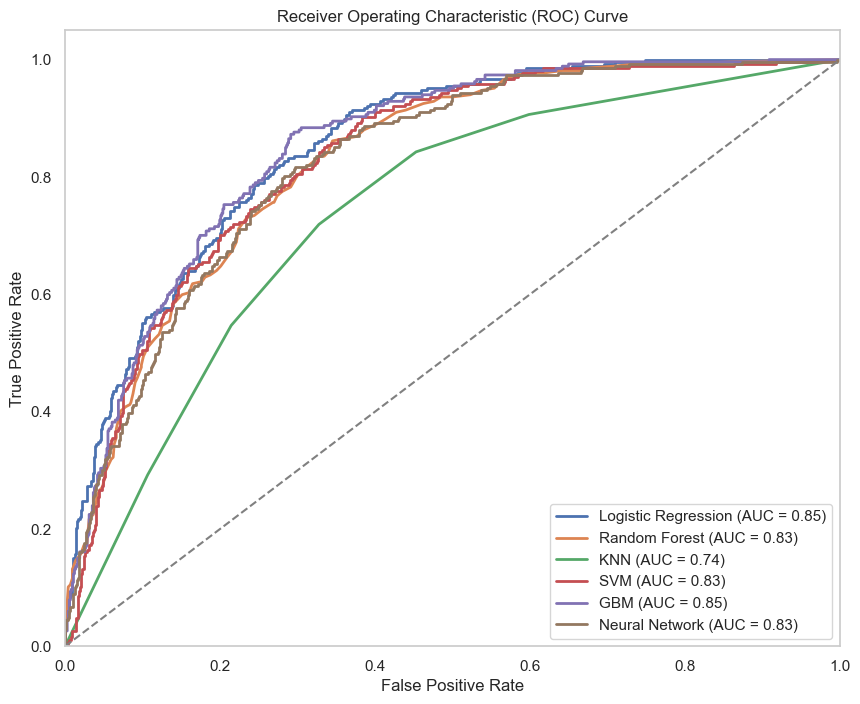

In [138]:
# Plot ROC AUC Curve for balanced pipeline
def plot_roc_auc_curves(balanced_pipeline, X_test, y_test_encoded, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    # Iterate over each model in the balanced pipeline
    for model_name, pipeline in balanced_pipeline.items():
        # Get predicted probabilities
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot random guessing line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

plot_roc_auc_curves(balanced_pipeline, X_test, y_test_encoded)

#### Summary of Findings:

##### Model Performance Metrics:

- Accuracy- All models achieve relatively high accuracy scores ranging from 0.686 to 0.791. This indicates that they perform well in overall prediction correctness on balanced data -The highest performing being Random Forest with 0.790. But our target was >0.80

- Precision- Measures how many of the predicted positive instances (churn) are actually positive -Logistic Regression and GBM show the highest precision scores around 0.808 and 0.802, respectively. Meeting the set threshold of >0.80

- Recall: Reflects how many of the actual positive instances (churn) were predicted correctly -Random Forest achieves the highest recall score at 0.790 followed by GBM 0.784. Both do not meet threshold of >0.80

F1-score: Balances the trade-off between precision and recall, providing a single metric to evaluate model performance -Random Forest achieves the highest F1-score of 0.791, closely followed by GBM at 0.790 meeting the threshold of atleast 0.75

##### Model Comparison and Recommendations

- Random Forest and GBM consistently perform well across all metrics (accuracy, precision, recall, and F1-score). They are particularly robust in maintaining high F1-scores, suggesting effective balance between identifying churn cases and minimizing false positives.

- Logistic Regression and SVM also demonstrate strong performance with high precision scores, making them reliable choices for applications where precision in predicting churn is critical.

- Neural Network shows competitive performance but slightly lower precision compared to other models, indicating potential for further optimization or tuning.

- KNN exhibits the lowest recall among the models, which suggests it may struggle more with correctly identifying churn cases, especially in situations where recall is crucial.

#### Conclusion:

The ensemble methods (Random Forest and GBM) stand out for their balanced performance across all metrics on balanced data. They are recommended for applications where F1 Score is the highest consideration like in this case. And therefore moving forwward we will fine tune this 2 to ensure maximum performance and the one with best performance we will use to test our test dataset

Logistic Regression and SVM offer strong precision and are suitable for scenarios prioritizing precision in churn prediction.

Neural Network shows promise but may benefit from further fine-tuning to improve precision and overall performance.

#### Perform Hyperparameter Tuning
For this we selected the top performing models which are GBM and Random Forest Classification and see which one best performs after hyperparameter tuning in order to pick the best performing model

- GBM HYPERPARAMETER TUNING

In [139]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    
    model = GradientBoostingClassifier(**params, random_state=42)
    
    pipeline = imbPipeline([
        ('preprocessor', preprocessor),
        ('oversampler', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    try:
        score = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='f1_weighted', error_score='raise').mean()
    except Exception as e:
        print(f"Error in trial with parameters: {params}")
        print(f"Error message: {str(e)}")
        return float('-inf')  # Return a very low score to indicate failure
    
    return score

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1_score = study.best_value

print("Best Parameters:", best_params)
print("Best F1-Score:", best_f1_score)

[I 2024-07-25 17:34:33,092] A new study created in memory with name: no-name-2f5ceee5-3015-4cec-b119-de7b7b89f696
[I 2024-07-25 17:39:18,634] Trial 0 finished with value: 0.7899274972847528 and parameters: {'n_estimators': 777, 'learning_rate': 0.004841019310897411, 'max_depth': 27, 'min_samples_split': 15, 'min_samples_leaf': 2, 'subsample': 0.6496453034704115, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7899274972847528.
[I 2024-07-25 17:39:18,868] Trial 1 finished with value: -inf and parameters: {'n_estimators': 227, 'learning_rate': 0.14336519468879427, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 18, 'subsample': 0.586051347685046, 'max_features': 'auto'}. Best is trial 0 with value: 0.7899274972847528.


Error in trial with parameters: {'n_estimators': 227, 'learning_rate': 0.14336519468879427, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 18, 'subsample': 0.586051347685046, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-25 17:39:19,101] Trial 2 finished with value: -inf and parameters: {'n_estimators': 297, 'learning_rate': 0.001647227768431364, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 19, 'subsample': 0.5044577825272992, 'max_features': 'auto'}. Best is trial 0 with value: 0.7899274972847528.


Error in trial with parameters: {'n_estimators': 297, 'learning_rate': 0.001647227768431364, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 19, 'subsample': 0.5044577825272992, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-25 17:42:27,331] Trial 3 finished with value: 0.7882498085367712 and parameters: {'n_estimators': 754, 'learning_rate': 0.004844025489848136, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 7, 'subsample': 0.6958880311638191, 'max_features': 'log2'}. Best is trial 0 with value: 0.7899274972847528.
[I 2024-07-25 17:43:41,601] Trial 4 finished with value: 0.7619807760716475 and parameters: {'n_estimators': 356, 'learning_rate': 0.15417754650412183, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 9, 'subsample': 0.6240618891452958, 'max_features': 'log2'}. Best is trial 0 with value: 0.7899274972847528.
[I 2024-07-25 17:47:04,073] Trial 5 finished with value: 0.770446010079992 and parameters: {'n_estimators': 812, 'learning_rate': 0.032949691934166594, 'max_depth': 25, 'min_samples_split': 19, 'min_samples_leaf': 14, 'subsample': 0.9356842508376033, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7899274972847528.
[I 2024-07-25 17:49:31,588] T

Error in trial with parameters: {'n_estimators': 539, 'learning_rate': 0.4651191961157701, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 15, 'subsample': 0.8203510211577697, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-25 18:53:14,074] Trial 11 finished with value: 0.7800970043998137 and parameters: {'n_estimators': 616, 'learning_rate': 0.014801853357541965, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 1, 'subsample': 0.6744155877643213, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.7913339923387359.
[I 2024-07-25 18:53:22,017] Trial 12 finished with value: 0.7889213251194181 and parameters: {'n_estimators': 106, 'learning_rate': 0.0011278480584675332, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 1, 'subsample': 0.5540191910621413, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.7913339923387359.
[I 2024-07-25 18:53:58,117] Trial 13 finished with value: 0.7842129132446599 and parameters: {'n_estimators': 553, 'learning_rate': 0.015296615978962504, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 14, 'subsample': 0.7032840015719605, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.7913339923387359.
[I 2024-07-25 18:54:58,0

Error in trial with parameters: {'n_estimators': 235, 'learning_rate': 0.007159347860198511, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 17, 'subsample': 0.747226417788318, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-25 18:57:05,062] Trial 20 finished with value: 0.7934621134476004 and parameters: {'n_estimators': 472, 'learning_rate': 0.05497642840317137, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 20, 'subsample': 0.8562711069355791, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-25 18:57:10,215] Trial 21 finished with value: 0.779466541175913 and parameters: {'n_estimators': 450, 'learning_rate': 0.05443450661596209, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 20, 'subsample': 0.9925947094522296, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-25 18:57:32,075] Trial 22 finished with value: 0.7921904946273526 and parameters: {'n_estimators': 647, 'learning_rate': 0.010804000197772702, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 18, 'subsample': 0.8555957523407326, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:11:50,378] 

Error in trial with parameters: {'n_estimators': 333, 'learning_rate': 0.07998245800663663, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 16, 'subsample': 0.8206757096397016, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 08:13:52,901] Trial 29 finished with value: 0.7754930643469778 and parameters: {'n_estimators': 129, 'learning_rate': 0.023162304661820964, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 12, 'subsample': 0.9771192335565095, 'max_features': 'log2'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:14:13,447] Trial 30 finished with value: 0.790722660400003 and parameters: {'n_estimators': 264, 'learning_rate': 0.01104350071875191, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 16, 'subsample': 0.8177314712968317, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:15:12,395] Trial 31 finished with value: 0.7907911567627582 and parameters: {'n_estimators': 494, 'learning_rate': 0.004162687186550363, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 19, 'subsample': 0.7676579743863947, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:15:27,890

Error in trial with parameters: {'n_estimators': 493, 'learning_rate': 0.005370988624860806, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 20, 'subsample': 0.8060126951167956, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 08:16:36,610] Trial 35 finished with value: 0.774672853174016 and parameters: {'n_estimators': 315, 'learning_rate': 0.04038292419828107, 'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 17, 'subsample': 0.8409042129304326, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:16:52,153] Trial 36 finished with value: 0.7737204605219274 and parameters: {'n_estimators': 375, 'learning_rate': 0.14993712044819488, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 19, 'subsample': 0.5183455915033168, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:17:32,673] Trial 37 finished with value: 0.7901517676160352 and parameters: {'n_estimators': 688, 'learning_rate': 0.005981057557655996, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 15, 'subsample': 0.600286561918711, 'max_features': 'log2'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:18:12,096] 

Error in trial with parameters: {'n_estimators': 287, 'learning_rate': 0.019163503358978727, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 14, 'subsample': 0.8940929445011725, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 08:18:40,459] Trial 41 finished with value: 0.7892879962863028 and parameters: {'n_estimators': 440, 'learning_rate': 0.009256487684344087, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 18, 'subsample': 0.6655187803007842, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:18:54,274] Trial 42 finished with value: 0.791636920306239 and parameters: {'n_estimators': 403, 'learning_rate': 0.010364961229970502, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 19, 'subsample': 0.6191689677770347, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:19:10,975] Trial 43 finished with value: 0.7776948755175708 and parameters: {'n_estimators': 384, 'learning_rate': 0.04102791248858126, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 19, 'subsample': 0.6157796636040563, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:19:32

Error in trial with parameters: {'n_estimators': 844, 'learning_rate': 0.007525968705704468, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 13, 'subsample': 0.9364093292448055, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 08:27:00,888] Trial 58 finished with value: 0.7913793177913039 and parameters: {'n_estimators': 731, 'learning_rate': 0.004801011106225732, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 4, 'subsample': 0.8664424842995662, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:27:33,931] Trial 59 finished with value: 0.7832959502093625 and parameters: {'n_estimators': 781, 'learning_rate': 0.0127086717388405, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 14, 'subsample': 0.7935868527930492, 'max_features': 'log2'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:28:02,426] Trial 60 finished with value: 0.7906682923147139 and parameters: {'n_estimators': 611, 'learning_rate': 0.0016494133948562106, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 16, 'subsample': 0.9142232143477881, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 08:28:19,5

Error in trial with parameters: {'n_estimators': 650, 'learning_rate': 0.0012854891308413546, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 14, 'subsample': 0.6765594206939572, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 09:00:27,578] Trial 69 finished with value: 0.7813840020687101 and parameters: {'n_estimators': 515, 'learning_rate': 0.002212915715880993, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 19, 'subsample': 0.5864305397597726, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:02:22,921] Trial 70 finished with value: 0.780195668151967 and parameters: {'n_estimators': 570, 'learning_rate': 0.017213254940628177, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 15, 'subsample': 0.9071341239930365, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:03:14,999] Trial 71 finished with value: 0.7900351971088277 and parameters: {'n_estimators': 394, 'learning_rate': 0.008616209794629357, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 19, 'subsample': 0.6287707122136165, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:04:08,

Error in trial with parameters: {'n_estimators': 778, 'learning_rate': 0.047398109882932554, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 18, 'subsample': 0.8065137434629995, 'max_features': 'auto'}
Error message: The 'max_features' parameter of cross_val_score must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-07-26 09:21:02,663] Trial 81 finished with value: 0.7893491394772788 and parameters: {'n_estimators': 712, 'learning_rate': 0.004988480622080734, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 3, 'subsample': 0.8618565712167481, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:23:20,319] Trial 82 finished with value: 0.7917438599445692 and parameters: {'n_estimators': 754, 'learning_rate': 0.003614754311326462, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 5, 'subsample': 0.8658009237366788, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:24:40,212] Trial 83 finished with value: 0.7708653141076216 and parameters: {'n_estimators': 505, 'learning_rate': 0.06659701852325296, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.883613466429821, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.7934621134476004.
[I 2024-07-26 09:26:36,838]

Best Parameters: {'n_estimators': 472, 'learning_rate': 0.05497642840317137, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 20, 'subsample': 0.8562711069355791, 'max_features': 'sqrt'}
Best F1-Score: 0.7934621134476004


Observations

- The error message Error messages in the trials was later reaslised is because of the 'max_features' parameter was set to 'auto', which is not a valid option for the cross_val_score function in scikit-learn. And we'll be moving to correct this moving forward

- Optimization Progress: Despite encountering errors in some trials, the study continued to run and completed all 100 trials as specified (n_trials=100).

- The best F1-score observed during the study was 0.794, achieved in Trial 63 which was a slight improvement from 0.790

- RANDOM FOREST HYPERPARAMETER TUNING

In [140]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
    }
    model = RandomForestClassifier(**params)
    pipeline = imbPipeline([
        ('preprocessor', preprocessor),
        ('oversampler', SMOTE()),
        ('classifier', model)
    ])
    score = cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_f1_score = study.best_value

print("Best Parameters:", best_params)
print("Best F1-Score:", best_f1_score)

[I 2024-07-26 11:43:03,674] A new study created in memory with name: no-name-e06cce07-9a6e-43f0-a8b5-5d0ff499d36e
[I 2024-07-26 11:43:23,330] Trial 0 finished with value: 0.636536772416914 and parameters: {'n_estimators': 408, 'max_depth': 5}. Best is trial 0 with value: 0.636536772416914.
[I 2024-07-26 11:44:32,859] Trial 1 finished with value: 0.5970318917484911 and parameters: {'n_estimators': 751, 'max_depth': 28}. Best is trial 0 with value: 0.636536772416914.
[I 2024-07-26 11:45:11,545] Trial 2 finished with value: 0.6263387458807284 and parameters: {'n_estimators': 511, 'max_depth': 11}. Best is trial 0 with value: 0.636536772416914.
[I 2024-07-26 11:46:05,248] Trial 3 finished with value: 0.6189424879928644 and parameters: {'n_estimators': 683, 'max_depth': 12}. Best is trial 0 with value: 0.636536772416914.
[I 2024-07-26 11:46:24,801] Trial 4 finished with value: 0.6016074561623199 and parameters: {'n_estimators': 212, 'max_depth': 18}. Best is trial 0 with value: 0.6365367724

Best Parameters: {'n_estimators': 116, 'max_depth': 7}
Best F1-Score: 0.6420398945778192


Observation

- Trial Number: Trial 99 indicates that this was the 99th trial conducted during the optimization process.

- Trial Result: The F1-score observed for this trial was 0.635314351632384.

- Trial Parameters: The hyperparameters tested during this trial were {'n_estimators': 335, 'max_depth': 9}.

- Best Trial: The best F1-score observed overall throughout all trials was 0.6424022851349124, achieved in Trial 40.

From an initial F1 Score of 0.791 to 0.644 is a drop we will be adjusting the hyperparameters for better performance of the tuning

##### Challanges and Moving Forward
- The only Major Challange was with the hyperparameter tunings of our 2 best performing models which we will seek to work it out with the best hyperparameters so that we can move forward to sellecting the best model for our test data
- Other Challanges were learning oportnities.
- We will also be exporting core machine learning Components for future use in other projects